# SMART PREMIUM ANALYSIS

### **Problem Statement**
    **- Insurance companies use various factors such as age, income, health status, and claim history to estimate premiums for customers. The goal of this project is to build a machine learning model that accurately predicts insurance premiums based on customer characteristics and policy details.**

### Importing and understanding the data

In [36]:
# import libraries which are used in the code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import os
import joblib
import mlflow
# import        .sklearn

from sklearn.model_selection import GridSearchCV , RandomizedSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import  OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# ignore all the warning messages
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("/Users/muralidharanv/Documents/GUVI /PROJECTS/Smart Premium/DATA/playground-series-s4e12 (1)/train.csv",index_col=0)
data.head(25)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0


## DATA CLEANING

<h3 style="color:#00ccff">Characteristics of the Data</h3>

In [3]:
df = data.copy()
df.head(25)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0


In [4]:
# Shape and info
print("Shape of dataset:", df.shape)
df.info()

# Summary statistics
df.describe().T


Shape of dataset: (1200000, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy 

,count,mean,std,min,25%,50%,75%,max
Age,1181295.0,41.145563,13.539950,18.000000,30.000000,41.000000,53.000000,64.000000
Annual Income,1155051.0,32745.217777,32179.506124,1.000000,8001.000000,23911.000000,44634.000000,149997.000000
Number of Dependents,1090328.0,2.009934,1.417338,0.000000,1.000000,2.000000,3.000000,4.000000
Health Score,1125924.0,25.613908,12.203462,2.012237,15.918959,24.578648,34.527209,58.975914
Previous Claims,835971.0,1.002689,0.982840,0.000000,0.000000,1.000000,2.000000,9.000000
Vehicle Age,1199994.0,9.569889,5.776189,0.000000,5.000000,10.000000,15.000000,19.000000
Credit Score,1062118.0,592.924350,149.981945,300.000000,468.000000,595.000000,721.000000,849.000000
Insurance Duration,1199999.0,5.018219,2.594331,1.000000,3.000000,5.000000,7.000000,9.000000
Premium Amount,1200000.0,1102.544822,864.998859,20.000000,514.000000,872.000000,1509.000000,4999.000000


<h2 style="color:#b32d00">Missing values count</h3>


In [5]:
# Missing values count
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

print(missing_df)


                      Missing Count  Missing %
Previous Claims              364029  30.335750
Occupation                   358075  29.839583
Credit Score                 137882  11.490167
Number of Dependents         109672   9.139333
Customer Feedback             77824   6.485333
Health Score                  74076   6.173000
Annual Income                 44949   3.745750
Age                           18705   1.558750
Marital Status                18529   1.544083
Vehicle Age                       6   0.000500
Insurance Duration                1   0.000083
Location                          0   0.000000
Policy Type                       0   0.000000
Gender                            0   0.000000
Education Level                   0   0.000000
Policy Start Date                 0   0.000000
Smoking Status                    0   0.000000
Exercise Frequency                0   0.000000
Property Type                     0   0.000000
Premium Amount                    0   0.000000


<h2 style="color:#2eb82e">Handling Missing values</h3>


In [6]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

print("Numeric columns:")
print(numeric_cols)
print("\nCategorical columns:")
print(categorical_cols)

# Impute numeric columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Impute categorical with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
}).sort_values(by='Missing %', ascending=False)

print(missing_df)


Numeric columns:
Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

Categorical columns:
Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')
                      Missing Count  Missing %
Age                               0        0.0
Gender                            0        0.0
Property Type                     0        0.0
Exercise Frequency                0        0.0
Smoking Status                    0        0.0
Customer Feedback                 0        0.0
Policy Start Date                 0        0.0
Insurance Duration                0        0.0
Credit Score                      0        0.0
Vehicle Age                       0        0.0
Previous Claims

In [7]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')
print(df.dtypes)

Age                            float64
Gender                          object
Annual Income                  float64
Marital Status                  object
Number of Dependents           float64
Education Level                 object
Occupation                      object
Health Score                   float64
Location                        object
Policy Type                     object
Previous Claims                float64
Vehicle Age                    float64
Credit Score                   float64
Insurance Duration             float64
Policy Start Date       datetime64[ns]
Customer Feedback               object
Smoking Status                  object
Exercise Frequency              object
Property Type                   object
Premium Amount                 float64
dtype: object


<h2 style="color:#3377ff">Finding Duplicates</h3>


In [8]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


<h2 style="color:#40ff00">Finding Outliers</h3>


In [9]:
## remove premimum amount column from the numeric columns
numeric_cols = numeric_cols[numeric_cols != 'Premium Amount']
print("Numeric columns after removing 'Premium Amount':")
print(numeric_cols)

Numeric columns after removing 'Premium Amount':
Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration'],
      dtype='object')


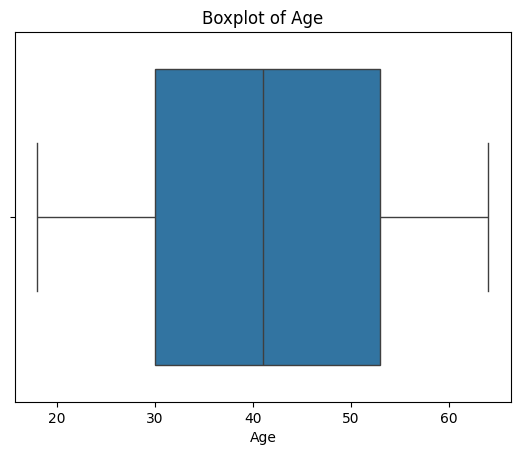

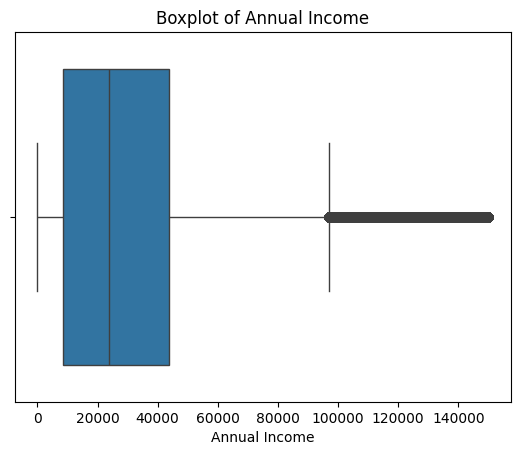

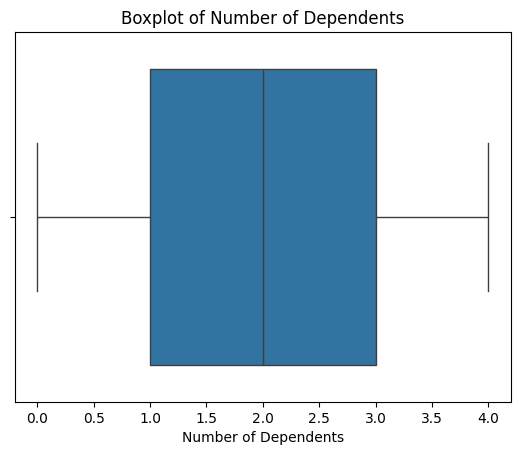

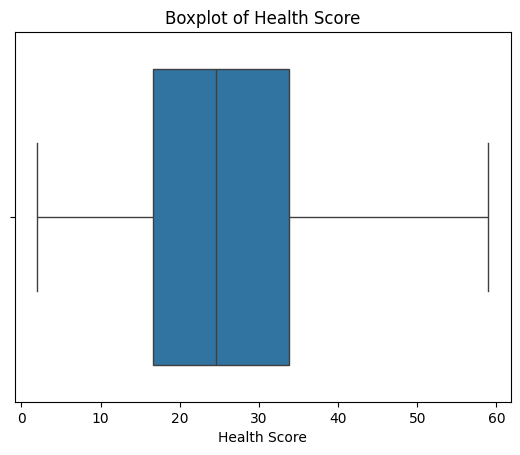

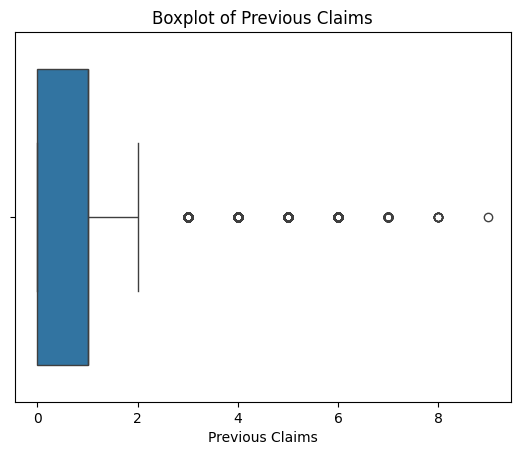

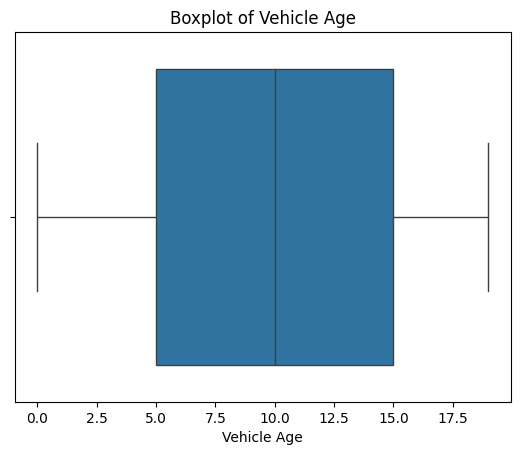

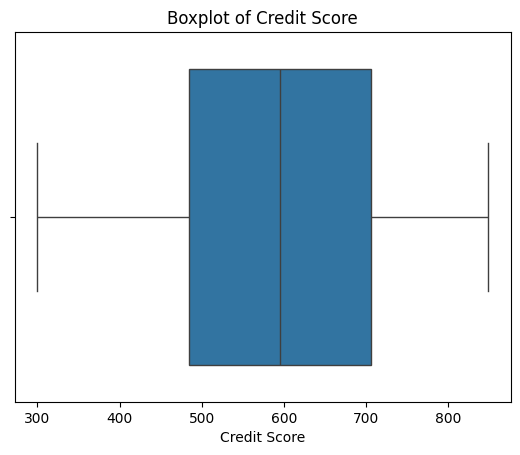

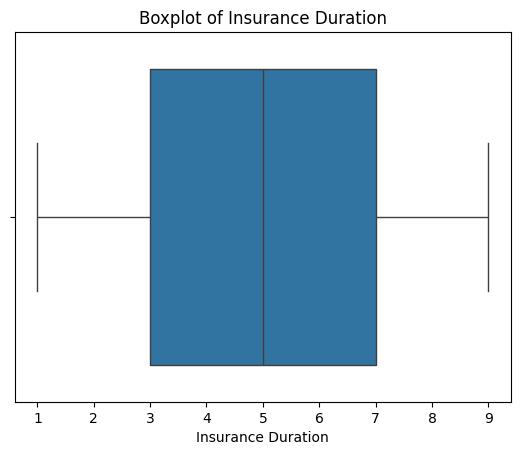

In [10]:
# Visual check for outliers
for col in numeric_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

<h2 style="color:#3377ff">Removing Outliers</h3>


In [11]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

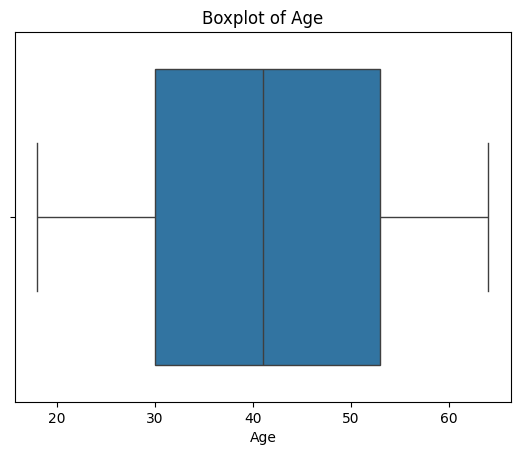

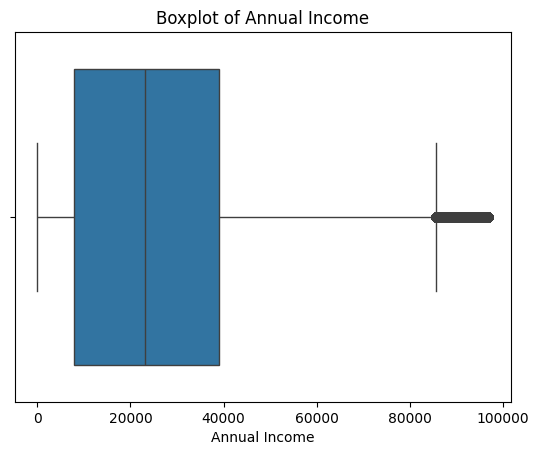

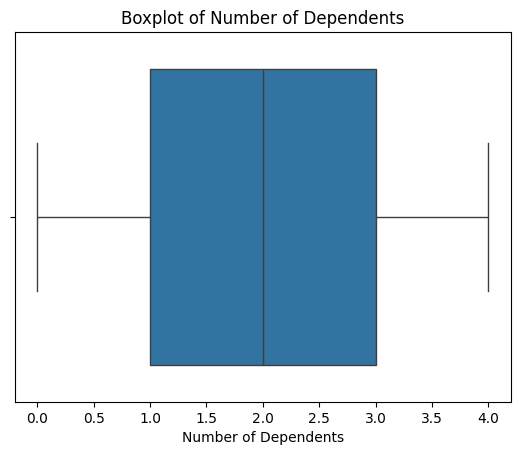

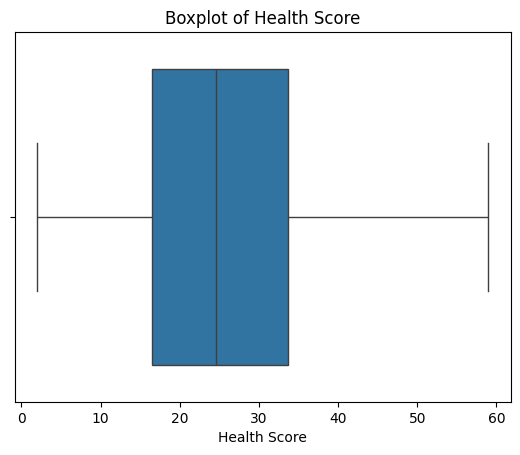

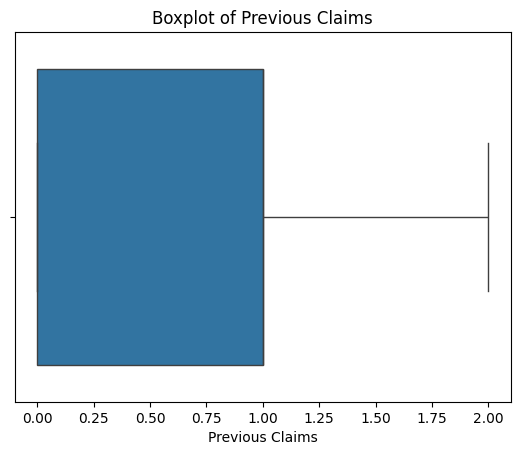

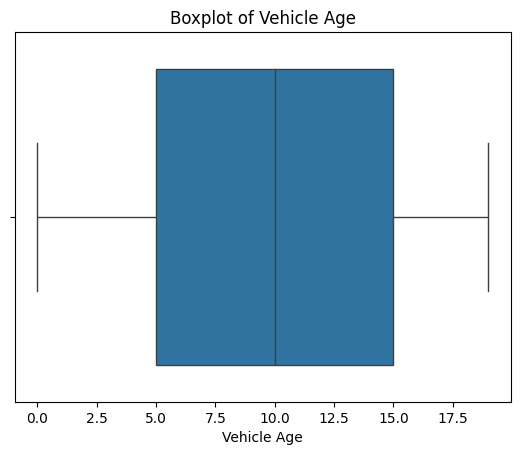

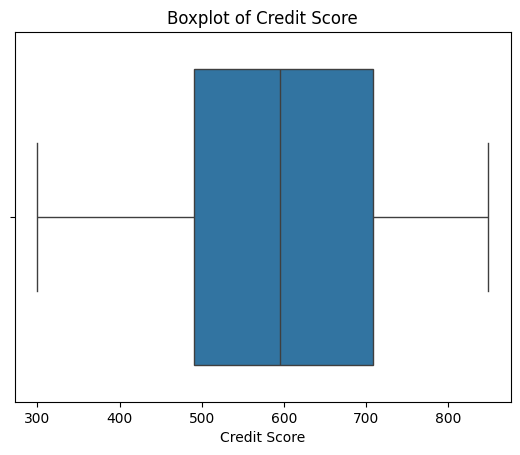

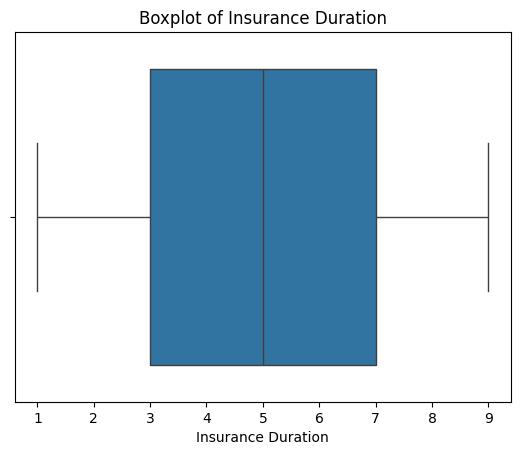

In [12]:
# Visual check for outliers
for col in numeric_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

<h2 style="color:#2E8B57">📊 Exploratory Data Analysis -- EDA </h2>


#### EDA helps understand:

* Distribution of values

* Relationships between variables

* Trends, anomalies, and patterns

* Key business insights

In [13]:
df['Age Group'] = pd.cut(df['Age'], 
                         bins=[18, 25, 35, 45, 60, 100],
                         labels=['18-25', '26-35', '36-45', '46-60', '60+'],
                         include_lowest=True)

# Drop missing values for critical columns
df_cleaned = df.dropna(subset=['Age Group', 'Gender', 'Premium Amount'])

# Group by Age Group and Gender, then calculate mean Premium
grouped = df_cleaned.groupby(['Age Group', 'Gender'])['Premium Amount'].mean().reset_index()

# Plot
fig = px.bar(grouped, x='Age Group', y='Premium Amount', color='Gender', barmode='group',
             labels={'Premium Amount': 'Average Premium'}, 
             title='Average Premium Amount by Age Group and Gender')

fig.update_layout(xaxis_title='Age Group', yaxis_title='Average Premium', 
                  legend_title='Gender', template='plotly_white')

fig.show()

In [14]:
"""
# Capping extreme outliers in Premium Amount at 1st and 99th percentiles
q_low = df['Premium Amount'].quantile(0.01)
q_high = df['Premium Amount'].quantile(0.99)

df['Premium_Capped'] = df['Premium Amount'].clip(lower=q_low, upper=q_high) # Capping the outliers at 1st and 99th percentile
"""

## sort the df by premium amount in descending order
df.sort_values(by='Premium Amount', ascending=False, inplace=True)
df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Age Group
id,,,,,,,,,,,,,,,,,,,,,
848669,19.0,Male,14900.0,Single,0.0,High School,Employed,23.246886,Urban,Basic,...,17.0,552.0,6.0,2022-11-11 15:21:39.170099,Good,No,Rarely,House,4999.0,18-25
767167,51.0,Male,38988.0,Divorced,2.0,High School,Unemployed,26.002469,Rural,Basic,...,10.0,778.0,2.0,2020-07-06 15:21:39.134960,Good,Yes,Rarely,Condo,4997.0,46-60
877994,26.0,Female,79801.0,Single,3.0,Master's,Unemployed,19.739327,Rural,Premium,...,5.0,571.0,3.0,2021-06-30 15:21:39.155231,Average,Yes,Weekly,Apartment,4997.0,26-35
1169248,62.0,Female,8440.0,Married,3.0,Master's,Unemployed,21.997465,Urban,Premium,...,1.0,581.0,5.0,2020-01-04 15:21:39.092127,Good,Yes,Daily,Apartment,4996.0,60+
75643,52.0,Female,23435.0,Single,1.0,Master's,Employed,13.285972,Urban,Basic,...,15.0,340.0,8.0,2021-10-16 15:21:39.237118,Average,No,Daily,Apartment,4994.0,46-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481123,60.0,Male,3347.0,Divorced,0.0,PhD,Unemployed,10.759581,Rural,Basic,...,12.0,775.0,3.0,2024-02-21 15:21:39.237118,Average,Yes,Monthly,Condo,20.0,46-60
7366,50.0,Male,23911.0,Married,0.0,High School,Employed,23.939043,Urban,Basic,...,14.0,493.0,8.0,2021-06-13 15:21:39.190215,Good,No,Daily,Apartment,20.0,46-60
919749,62.0,Female,27991.0,Married,4.0,PhD,Self-Employed,30.938164,Suburban,Basic,...,2.0,307.0,7.0,2022-08-29 15:21:39.081504,Average,Yes,Daily,Condo,20.0,60+


In [15]:
pivot_table = df_cleaned.pivot_table(index='Policy Type',
                                     columns='Insurance Duration',
                                     values='Premium Amount',
                                     aggfunc='mean')

# Plot using Plotly
fig = px.imshow(pivot_table,
                text_auto=True,
                color_continuous_scale='YlGnBu',
                labels=dict(color='Avg Premium'),
                title='Average Premium by Policy Type and Insurance Duration')

fig.update_layout(xaxis_title='Insurance Duration (Years)',
                  yaxis_title='Policy Type',
                  template='plotly_white')

fig.show()

In [16]:
df['Policy Month'] = df['Policy Start Date'].dt.to_period('M').astype(str)

monthly_summary = df.groupby('Policy Month').agg(
    avg_premium=('Premium Amount', 'mean'),
    policy_count=('Policy Type', 'count')
).reset_index()

print(monthly_summary)

   Policy Month  avg_premium  policy_count
0       2019-08  1177.180360          7668
1       2019-09  1161.617339         17164
2       2019-10  1173.385611         16846
3       2019-11  1175.708575         15661
4       2019-12  1168.498099         16304
..          ...          ...           ...
56      2024-04  1098.790601         17235
57      2024-05  1093.916799         18882
58      2024-06  1101.065467         16176
59      2024-07  1100.957051         16671
60      2024-08  1120.896542          7317

[61 rows x 3 columns]


In [17]:
fig = go.Figure()

# Line for average premium
fig.add_trace(go.Scatter(
    x=monthly_summary['Policy Month'],
    y=monthly_summary['avg_premium'],
    mode='lines+markers',
    name='Average Premium',
    line=dict(color='blue')
))

# Bar for number of policies
fig.add_trace(go.Bar(
    x=monthly_summary['Policy Month'],
    y=monthly_summary['policy_count'],
    name='Number of Policies',
    marker_color='orange',
    yaxis='y2'
))


# Layout with dual y-axes
fig.update_layout(
    title='Monthly Trends: Average Premium & Number of Policies',
    xaxis_title='Policy Start Month',
    yaxis=dict(title='Average Premium', side='left'),
    yaxis2=dict(title='Policy Count', overlaying='y', side='right', showgrid=False),
    legend=dict(x=0.5, xanchor='center', orientation='h'),
    template='plotly_white',
    height=500
)

fig.show()

In [18]:
# Define bins and labels
bins = [300, 500, 650, 750, 850]
labels = ['300-500', '500-650', '650-750', '750-850']

# Create a new column for bins
df['Credit Score Bin'] = pd.cut(df['Credit Score'], bins=bins, labels=labels, include_lowest=True)
# Group and aggregate
grouped_data = df.groupby(['Credit Score Bin', 'Marital Status'])['Premium Amount'].mean().reset_index()

fig = px.bar(grouped_data,
             x='Credit Score Bin',
             y='Premium Amount',
             color='Marital Status',
             barmode='stack',
             title='Stacked Premium Amount by Credit Score Range and Marital Status',
             template='plotly_white')

fig.update_layout(xaxis_title='Credit Score Range',
                  yaxis_title='Average Premium Amount',
                  legend_title='Marital Status')

fig.show()


In [19]:
## Which policy type premium amount increases or decreases over a period of time.

In [20]:
avg_premium_policy_type = df.groupby(['Policy Month', 'Policy Type'])['Premium Amount'].mean().reset_index()


fig1 = px.line(avg_premium_policy_type,
               x='Policy Month',
               y='Premium Amount',
               color='Policy Type',
               title='Average Premium Over Time by Policy Type',
               markers=True,
               template='plotly_white')

fig1.update_layout(xaxis_title='Policy Month',
                   yaxis_title='Average Premium')

fig1.show()


In [21]:
### Average Premium Over Time by Smoking Habit

In [22]:
avg_premium_smoking = df.groupby(['Policy Month', 'Smoking Status'])['Premium Amount'].mean().reset_index()

fig3 = px.line(avg_premium_smoking,
               x='Policy Month',
               y='Premium Amount',
               color='Smoking Status',
               title='Average Premium Over Time by Smoking Habit',
               markers=True,
               template='plotly_white')

fig3.update_layout(xaxis_title='Policy Month',
                   yaxis_title='Average Premium')

fig3.show()

## FEATURE ENGINEERING

In [23]:
# Ensure datetime
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])

# Date-related features
df['Policy Year'] = df['Policy Start Date'].dt.year
df['Policy Month'] = df['Policy Start Date'].dt.month
df['Policy Day'] = df['Policy Start Date'].dt.day
df['Policy Weekday'] = df['Policy Start Date'].dt.weekday
df.drop(columns=['Policy Start Date'], inplace=True)


df['Age Group'] = pd.cut(df['Age'],
                         bins=[18, 25, 35, 45, 60, 100],
                         labels=['18-25', '26-35', '36-45', '46-60', '60+'])

df['Credit Score Bucket'] = pd.cut(df['Credit Score'],
                                   bins=[0, 600, 700, 800, 900],
                                   labels=['Poor', 'Average', 'Good', 'Excellent'])


In [24]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Age Group', 'Credit Score Bin', 'Credit Score Bucket']


In [25]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



In [26]:
print(df_encoded.shape)
df_encoded.head()


(1072844, 43)


,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Month,...,Age Group_26-35,Age Group_36-45,Age Group_46-60,Age Group_60+,Credit Score Bin_500-650,Credit Score Bin_650-750,Credit Score Bin_750-850,Credit Score Bucket_Average,Credit Score Bucket_Good,Credit Score Bucket_Excellent
id,,,,,,,,,,,,,,,,,,,,,
848669,19.0,14900.0,0.0,23.246886,0.0,17.0,552.0,6.0,4999.0,11,...,False,False,False,False,True,False,False,False,False,False
767167,51.0,38988.0,2.0,26.002469,0.0,10.0,778.0,2.0,4997.0,7,...,False,False,True,False,False,False,True,False,True,False
877994,26.0,79801.0,3.0,19.739327,1.0,5.0,571.0,3.0,4997.0,6,...,True,False,False,False,True,False,False,False,False,False
1169248,62.0,8440.0,3.0,21.997465,0.0,1.0,581.0,5.0,4996.0,1,...,False,False,False,True,True,False,False,False,False,False
75643,52.0,23435.0,1.0,13.285972,1.0,15.0,340.0,8.0,4994.0,10,...,False,False,True,False,False,False,False,False,False,False


In [27]:
df_encoded = df_encoded.astype(int)
df_encoded.drop(columns=['ID'], inplace=True, errors='ignore')
df_encoded.head()


,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Month,...,Age Group_26-35,Age Group_36-45,Age Group_46-60,Age Group_60+,Credit Score Bin_500-650,Credit Score Bin_650-750,Credit Score Bin_750-850,Credit Score Bucket_Average,Credit Score Bucket_Good,Credit Score Bucket_Excellent
id,,,,,,,,,,,,,,,,,,,,,
848669,19,14900,0,23,0,17,552,6,4999,11,...,0,0,0,0,1,0,0,0,0,0
767167,51,38988,2,26,0,10,778,2,4997,7,...,0,0,1,0,0,0,1,0,1,0
877994,26,79801,3,19,1,5,571,3,4997,6,...,1,0,0,0,1,0,0,0,0,0
1169248,62,8440,3,21,0,1,581,5,4996,1,...,0,0,0,1,1,0,0,0,0,0
75643,52,23435,1,13,1,15,340,8,4994,10,...,0,0,1,0,0,0,0,0,0,0


In [28]:
df_encoded 

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Month,...,Age Group_26-35,Age Group_36-45,Age Group_46-60,Age Group_60+,Credit Score Bin_500-650,Credit Score Bin_650-750,Credit Score Bin_750-850,Credit Score Bucket_Average,Credit Score Bucket_Good,Credit Score Bucket_Excellent
id,,,,,,,,,,,,,,,,,,,,,
848669,19,14900,0,23,0,17,552,6,4999,11,...,0,0,0,0,1,0,0,0,0,0
767167,51,38988,2,26,0,10,778,2,4997,7,...,0,0,1,0,0,0,1,0,1,0
877994,26,79801,3,19,1,5,571,3,4997,6,...,1,0,0,0,1,0,0,0,0,0
1169248,62,8440,3,21,0,1,581,5,4996,1,...,0,0,0,1,1,0,0,0,0,0
75643,52,23435,1,13,1,15,340,8,4994,10,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481123,60,3347,0,10,1,12,775,3,20,2,...,0,0,1,0,0,0,1,0,1,0
7366,50,23911,0,23,1,14,493,8,20,6,...,0,0,1,0,0,0,0,0,0,0
919749,62,27991,4,30,1,2,307,7,20,8,...,0,0,0,1,0,0,0,0,0,0


In [29]:

## Model development

In [30]:
# Define X and y
X = df_encoded.drop(columns=['Premium Amount'])  # Change to your actual target
y = df_encoded['Premium Amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (858275, 42)
X_test shape: (214569, 42)
y_train shape: (858275,)
y_test shape: (214569,)


In [31]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return {'Model': model.__class__.__name__,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2 Score': r2}


In [ ]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_estimators=100, random_state=42),
    XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
]

results = []

for model in models:
    result = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append(result)

# Create a results DataFrame
results_df = pd.DataFrame(results).sort_values(by='R2 Score')
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,MAE,MSE,RMSE,R2 Score
0,DecisionTreeRegressor,887.990674,1.482320e+06,1217.505516,-1.054325
1,LinearRegression,652.503058,7.194885e+05,848.226670,0.002872
2,RandomForestRegressor,646.078327,7.059312e+05,840.197138,0.021660
3,XGBRegressor,631.382263,6.927576e+05,832.320626,0.039917


In [ ]:
best_model_name = results_df.iloc[0]['Model']
print(f"Best Model based on RMSE: {best_model_name}")


Best Model based on RMSE: XGBRegressor


## Finding the best hyperparameters for XGB Regressor using GridSearchCV.

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42, verbosity=0)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',  # or 'r2', 'neg_mean_absolute_error'
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate on Test Data
y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Best XGBoost Model RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")



Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   9.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   9.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   9.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   9.6s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   9.7s
[CV] END 

In [ ]:
best_params= grid_search.best_params_ 
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Model:", best_model)
print("Best Model RMSE:", rmse)
print("Best Model R² Score:", r2)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Best Model RMSE: 831.3116142578546
Best Model R² Score: 0.0422438383102417


## Finding the best hyperparameters for Random Forest Regressor using RandomizedSearchCV
## ===============================================================================

In [ ]:
# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the model
rf = RandomForestRegressor(random_state=42)

# Create the randomized search with 5-fold CV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,                # Number of combinations to try
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='r2',
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score (CV):", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test R2 Score:", r2_score(y_test, y_pred))



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time= 7.3min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time= 7.3min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time= 7.3min


In [ ]:
## finding the best parameters for the random forest model using the grid search

# Define the parameter grid (fewer combinations than RandomizedSearchCV to save time)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='r2'
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score (CV):", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test R2 Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total

In [ ]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


## Building an ML pipeline

In [ ]:

class SmartPremiumPipeline:
    def __init__(self):
        self.model = None
        self.preprocessor = None
        self.fitted = False

    def _clean_data(self, df):
        if 'Policy Start Date' in df.columns:
            df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')
            df['Policy_Year'] = df['Policy Start Date'].dt.year
            df['Policy_Month'] = df['Policy Start Date'].dt.month
            df['Policy_Weekday'] = df['Policy Start Date'].dt.weekday

        if 'Age' in df.columns:
            df['Age Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60, 100],
                                     labels=['18-25', '26-35', '36-45', '46-60', '60+'])

        if 'Credit Score' in df.columns:
            df['CreditScoreGroup'] = pd.cut(df['Credit Score'], bins=[300, 500, 650, 750, 850],
                                            labels=['Poor', 'Average', 'Good', 'Excellent'])

        return df

    def _remove_outliers(self, df, numerical_cols):
        for col in numerical_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        return df

    def fit(self, df, target_column, model_name='RandomForest', model_params={}):
        df = df.copy()

        num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

        for col in num_cols:
            df[col].fillna(df[col].median(), inplace=True)
        for col in cat_cols:
            df[col].fillna(df[col].mode()[0], inplace=True)

        df.drop_duplicates(inplace=True)

        if target_column in num_cols:
            num_cols.remove(target_column)
        df = self._remove_outliers(df, num_cols)

        df = self._clean_data(df)

        cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
        num_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=[target_column]).columns.tolist()

        self.preprocessor = ColumnTransformer([
            ('num', 'passthrough', num_features),
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
        ])

        X = df.drop(columns=[target_column])
        y = df[target_column]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        #with mlflow.start_run():
        if model_name == 'RandomForest':
            model = RandomForestRegressor(random_state=42, **model_params)
        elif model_name == 'XGBoost':
            from xgboost import XGBRegressor
            model = XGBRegressor(random_state=42, **model_params)
        elif model_name == 'LinearRegression':
            model = LinearRegression(**model_params)
        elif model_name == 'DecisionTree':
            model = DecisionTreeRegressor(random_state=42, **model_params)
        else:
            raise ValueError("Unsupported model")

        self.model = Pipeline(steps=[
            ('preprocessor', self.preprocessor),
            ('regressor', model)
        ])
        with mlflow.start_run(run_name=f"{model_name}_Run"):
            self.model.fit(X_train, y_train)
            self.fitted = True

            y_pred = self.model.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            print("Model Evaluation:", model_name)
            print("RMSE:", rmse)
            print("MAE:", mae)
            print("R^2 Score:", r2)

            if model_name in ['RandomForest', 'XGBoost']:
                save_path = f"saved_models/{model_name}_model.pkl"
                os.makedirs("saved_models", exist_ok=True)
                joblib.dump(self.model, save_path)
                print(f"{model_name} saved to {save_path}")

            mlflow.log_param("model_name", model_name)
            mlflow.log_params(model_params)
            mlflow.log_metric("rmse", rmse)
            mlflow.log_metric("mae", mae)
            mlflow.log_metric("r2_score", r2)
            mlflow.sklearn.log_model(self.model, artifact_path=f"model_{model_name}")

        

    def predict(self, df):
        if not self.fitted:
            raise Exception("Model not fitted. Please call fit() first.")

        df = df.copy()

        for col in df.select_dtypes(include=['int64', 'float64']).columns:
            df[col].fillna(df[col].median(), inplace=True)
        for col in df.select_dtypes(include=['object', 'category', 'bool']).columns:
            df[col].fillna(df[col].mode()[0], inplace=True)

        df = self._clean_data(df)
        
        cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
        num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

        self.preprocessor = ColumnTransformer([
            ('num', 'passthrough', num_features),
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
        ])

        predictions = self.model.predict(df)
        return predictions


### Pipeline usage: 

In [39]:
# Step 1: Load your data

train_df = pd.read_csv("/Users/muralidharanv/Documents/GUVI /PROJECTS/Smart Premium/DATA/playground-series-s4e12 (1)/train.csv",index_col=0)
test_df = pd.read_csv('/Users/muralidharanv/Documents/GUVI /PROJECTS/Smart Premium/DATA/playground-series-s4e12 (1)/test.csv', index_col=0)

# Step 2: Initialize the pipeline

pipeline = SmartPremiumPipeline()

# Step 3: Define the target column
target_column = "Premium Amount"

# Step 4: Fit the model using different algorithms
# Random Forest
pipeline.fit(train_df, target_column, model_name="RandomForest", model_params={"max_depth": 20, "max_features": 'sqrt', "min_samples_leaf": 2, "min_samples_split": 2, "n_estimators": 200})

# XGBoost
pipeline.fit(train_df, target_column, model_name="XGBoost", model_params={"n_estimators": 100, "max_depth": 7, "colsample_bytree": 1.0, "learning_rate": 0.1, "subsample": 1.0})

# Decision Tree
pipeline.fit(df, target_column, model_name="DecisionTree", model_params={"max_depth": 5})

# Linear Regression
pipeline.fit(train_df, target_column, model_name="LinearRegression")

# Step 5: Make predictions on new data (same features as training data, minus target column)
predictions = pipeline.predict(test_df)

# Step 6:  Save predictions
test_df['Predicted Premium Amount'] = predictions
print(test_df[['Predicted Premium Amount']].head())




Model Evaluation: RandomForest
RMSE: 837.2234600088482
MAE: 641.8410466143658
R^2 Score: 0.02693749927046729
RandomForest saved to saved_models/RandomForest_model.pkl


2025/05/21 20:45:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Run at: http://127.0.0.1:5000/#/experiments/400738423036369297/runs/b7b91992904b45f793ed3d90b33dc1b7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/400738423036369297
Model Evaluation: XGBoost
RMSE: 832.3211166922358
MAE: 632.8499102357459
R^2 Score: 0.03829962783299734
XGBoost saved to saved_models/XGBoost_model.pkl


2025/05/21 20:45:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoost_Run at: http://127.0.0.1:5000/#/experiments/400738423036369297/runs/3b05c8dcd2bb4e9896e302720df3d1ed
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/400738423036369297
Model Evaluation: DecisionTree
RMSE: 837.0955898532806
MAE: 639.6704786479111
R^2 Score: 0.0197902196541766


2025/05/21 20:46:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DecisionTree_Run at: http://127.0.0.1:5000/#/experiments/400738423036369297/runs/f67786508492467a8dfde01bad138cb1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/400738423036369297
Model Evaluation: LinearRegression
RMSE: 847.3757942193572
MAE: 652.0898106863131
R^2 Score: 0.003195326120823405


2025/05/21 20:46:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LinearRegression_Run at: http://127.0.0.1:5000/#/experiments/400738423036369297/runs/0e011d573636440a9943ab7a0abfdabb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/400738423036369297
         Predicted Premium Amount
id                               
1200000               1093.360818
1200001               1012.029201
1200002               1104.497643
1200003               1065.499084
1200004               1108.025568


In [38]:
# ml flow tracking server
mlflow.set_experiment("SmartPremium_First_Test_Experiment")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000") # Replace with your MLflow server URI
